#### Import Libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap

#### Load dataset

In [57]:
df = pd.read_csv('/content/NID_data.csv')
print("Loaded data shape:", df.shape)

Loaded data shape: (25192, 42)


In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [59]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [61]:
print("Missing values:", df.isna().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: 0
Duplicate rows: 0


#### One-Hot Encoding

In [62]:
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
25189,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Columns: 119 entries, duration to flag_SH
dtypes: bool(80), float64(15), int64(23), object(1)
memory usage: 9.4+ MB


In [64]:
y = df['class']
X = df.drop(columns=['class'])

#### SMOTE

In [65]:
class_counts_before = y.value_counts()
print("Before SMOTE:\n", class_counts_before)

Before SMOTE:
 class
normal     13449
anomaly    11743
Name: count, dtype: int64


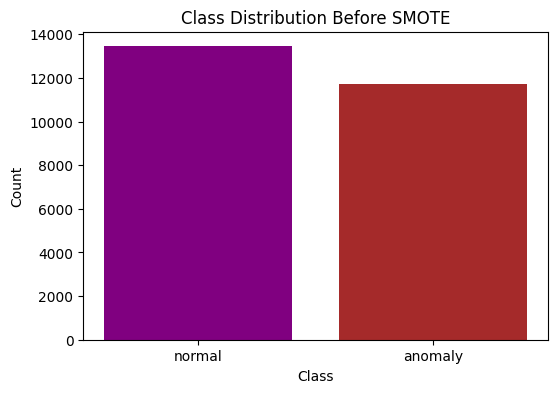

In [66]:
plt.figure(figsize=(6, 4))
plt.bar(['normal', 'anomaly'], class_counts_before.values, color=['purple', 'brown'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [67]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [68]:
class_counts_after = pd.Series(y_balanced).value_counts()
print("\nAfter SMOTE:\n", class_counts_after)


After SMOTE:
 class
normal     13449
anomaly    13449
Name: count, dtype: int64


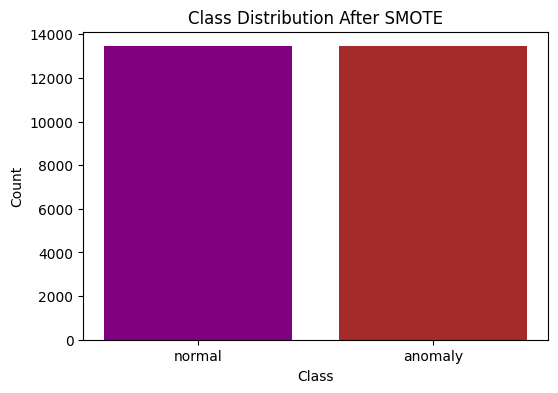

In [69]:
plt.figure(figsize=(6, 4))
plt.bar(['normal', 'anomaly'], class_counts_after.values, color=['purple', 'brown'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Label encoding

In [72]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Class labels mapping:")
for index, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} --> {index}")

Class labels mapping:
anomaly --> 0
normal --> 1


#### Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### Feature scaling

In [74]:
scaler_1 = StandardScaler()
X_train_scaled = scaler_1.fit_transform(X_train)
X_test_scaled = scaler_1.transform(X_test)


#### Feature selection

In [75]:
selector = SelectKBest(score_func=f_classif, k=13)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


# Selected feature indices
selected_idx = selector.get_support(indices=True)

# Selected feature names
selected_names = X_train.columns[selected_idx]

# Corresponding scores
selected_scores = selector.scores_[selected_idx]

# Create dataframe for neat display
selected_df = pd.DataFrame({
    "Feature": selected_names,
    "Score": selected_scores
})

print("\n=== Selected 13 Features with Scores ===")
print(selected_df)


selected_feature_names = selected_names.tolist()

print(" \nSelected 13 Features:")
print(selected_feature_names)


=== Selected 13 Features with Scores ===
                     Feature         Score
0                  logged_in  17628.186377
1                      count  10022.257436
2                serror_rate  14610.841602
3            srv_serror_rate  14440.090835
4              same_srv_rate  25389.780054
5         dst_host_srv_count  21332.959372
6     dst_host_same_srv_rate  17993.265599
7       dst_host_serror_rate  14615.345710
8   dst_host_srv_serror_rate  14832.109740
9               service_http   9149.610508
10           service_private   5027.758483
11                   flag_S0  14532.457975
12                   flag_SF  26400.739350
 
Selected 13 Features:
['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'service_private', 'flag_S0', 'flag_SF']


Reduce train/test to ONLY the 13 selected features

In [76]:
X_train_reduced = X_train[selected_feature_names]
X_test_reduced = X_test[selected_feature_names]

Fit the FINAL SCALER ONLY on these 13 features

In [77]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)


#### PCA

In [78]:
#pca = PCA(n_components=10)
#X_train_pca = pca.fit_transform(X_train_scaled_final)
#X_test_pca = pca.transform(X_test_scaled_final)

### Model Implementation

#### Random Forest

In [79]:
rnf = RandomForestClassifier(random_state = 42)
rnf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_train_pred_rnf = rnf.predict(X_train_pca)
training_accuracy = accuracy_score(y_train, y_train_pred_rnf)
print('Accuracy on Training data:', training_accuracy)

y_test_pred_rnf = rnf.predict(X_test_pca)
testing_accuracy = accuracy_score(y_test, y_test_pred_rnf)
print('Accuracy on Testing data:', testing_accuracy)

Accuracy on Training data: 0.9903736416414429
Accuracy on Testing data: 0.9692399285572534


In [81]:
print(classification_report(y_test, y_test_pred_rnf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2365
           1       0.97      0.98      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



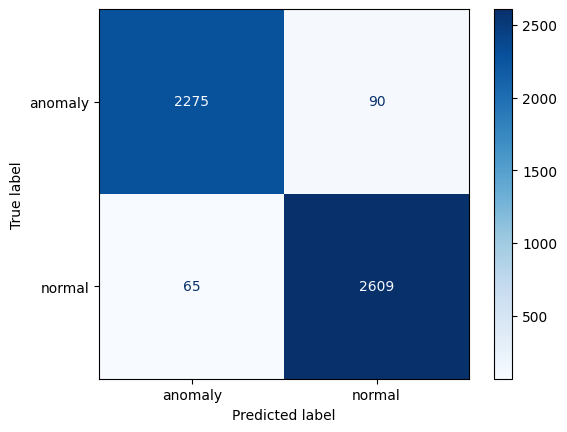

In [82]:
CM = confusion_matrix(y_test, y_test_pred_rnf, labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=["anomaly", "normal"])
cm_display.plot(cmap='Blues')
plt.show()

Random Forest AUC score:0.9688184395660349


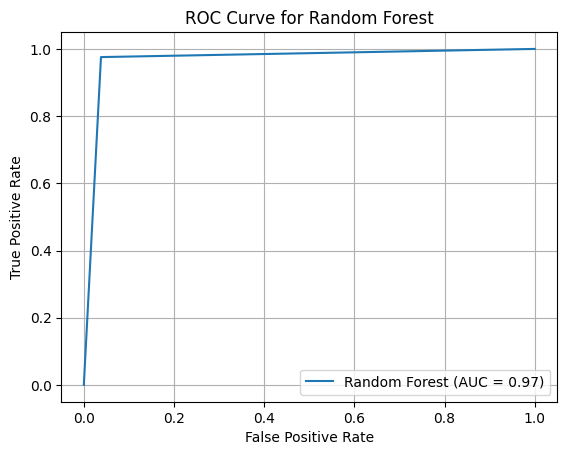

In [83]:
def plot_roc_curve(true_y, y_pred):
    fpr, tpr, thresholds = roc_curve(true_y, y_pred)
    plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(true_y, y_pred))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_test_pred_rnf)
print(f'Random Forest AUC score:{roc_auc_score(y_test, y_test_pred_rnf)}')

plt.title("ROC Curve for Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.show()

#### XGBoost

In [84]:
xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_train_pred_xgb = xgb.predict(X_train_pca)
training_data_accuracy = accuracy_score(y_train_pred_xgb, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

y_test_pred_xgb = xgb.predict(X_test_pca)
test_data_accuracy = accuracy_score(y_test_pred_xgb, y_test)
print('Accuracy on Testing data : ', test_data_accuracy)

Accuracy on Training data :  0.9840222299409517
Accuracy on Testing data :  0.9736058741813852


In [86]:
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2365
           1       0.97      0.98      0.98      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



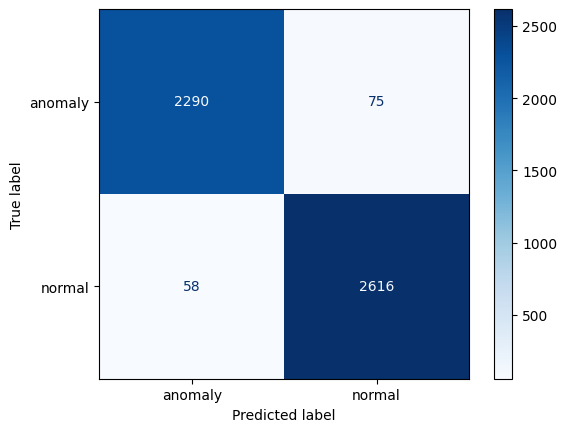

In [87]:
CM = confusion_matrix(y_test, y_test_pred_xgb, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ["anomaly","normal"])
cm_display.plot(cmap='Blues')
plt.show()

XGBoost AUC score:0.973298587446889


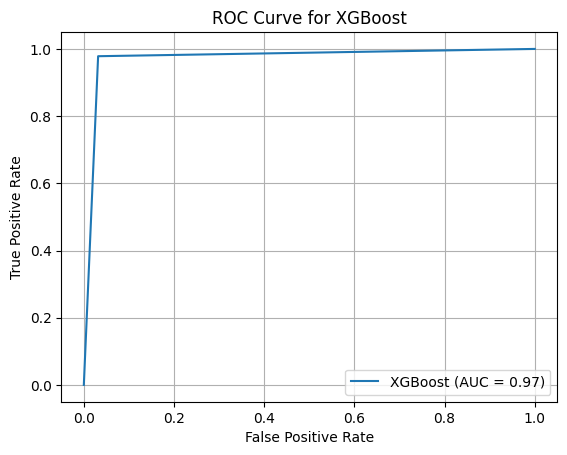

In [88]:
def plot_roc_curve(true_y, y_pred):
    fpr, tpr, thresholds = roc_curve(true_y, y_pred)
    plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc_score(true_y, y_pred))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_test_pred_xgb)
print(f'XGBoost AUC score:{roc_auc_score(y_test, y_test_pred_xgb)}')

plt.title("ROC Curve for XGBoost")
plt.legend(loc="best")
plt.grid(True)
plt.show()

#### LightGBM

In [89]:
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb.fit(X_train_pca, y_train)

[LightGBM] [Info] Number of positive: 10775, number of negative: 9378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 20153, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534660 -> initscore=0.138862
[LightGBM] [Info] Start training from score 0.138862


LGBMClassifier(random_state=42)

In [90]:
y_train_pred_lgb = lgb.predict(X_train_pca)
training_data_accuracy = accuracy_score(y_train_pred_lgb, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

y_test_pred_lgb = lgb.predict(X_test_pca)
testing_data_accuracy = accuracy_score(y_test_pred_lgb, y_test)
print('Accuracy on Testing data : ', testing_data_accuracy)

Accuracy on Training data :  0.9800029772242346
Accuracy on Testing data :  0.9730105179599127


In [91]:
print(classification_report(y_test, y_test_pred_lgb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2365
           1       0.97      0.98      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



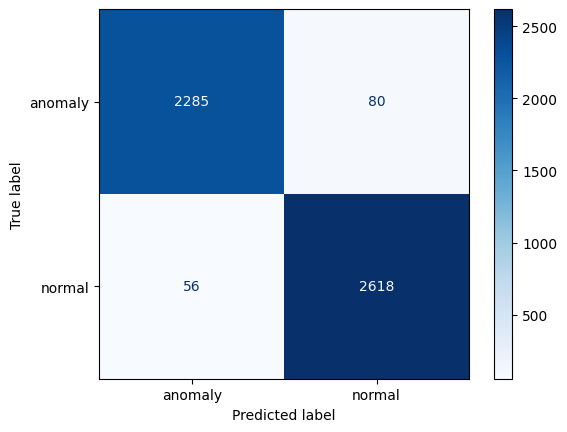

In [92]:
CM = confusion_matrix(y_test, y_test_pred_lgb, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ["anomaly","normal"])
cm_display.plot(cmap='Blues')
plt.show()

model 1 AUC score:0.9726154765726176


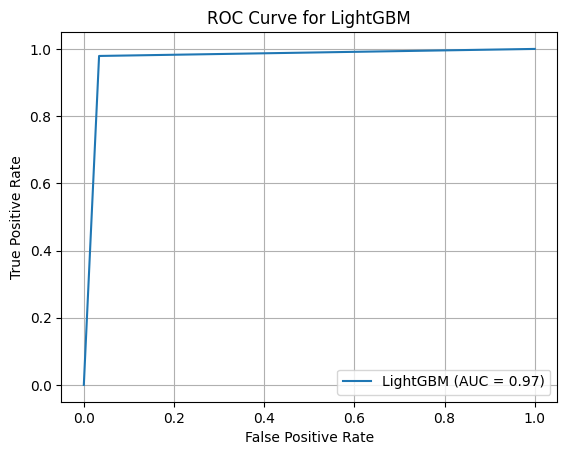

In [93]:
def plot_roc_curve(true_y, y_pred):
    fpr, tpr, thresholds = roc_curve(true_y, y_pred)
    plt.plot(fpr, tpr, label='LightGBM (AUC = %0.2f)' % roc_auc_score(true_y, y_pred))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_test_pred_lgb)
print(f'model 1 AUC score:{roc_auc_score(y_test, y_test_pred_lgb)}')

plt.title("ROC Curve for LightGBM")
plt.legend(loc="best")
plt.grid(True)
plt.show()

#### Extra Trees

In [94]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train_pca, y_train)

ExtraTreesClassifier(random_state=42)

In [95]:
y_train_pred_et = et.predict(X_train_pca)
training_data_accuracy = accuracy_score(y_train_pred_et, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

y_test_pred_et = et.predict(X_test_pca)
testing_data_accuracy = accuracy_score(y_test_pred_et, y_test)
print('Accuracy on Testing data : ', testing_data_accuracy)

Accuracy on Training data :  0.9903736416414429
Accuracy on Testing data :  0.9670569557451876


In [96]:
print(classification_report(y_test, y_test_pred_et))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2365
           1       0.97      0.97      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



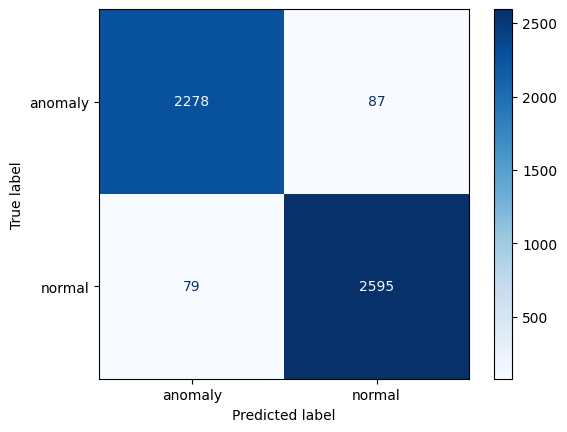

In [97]:
CM = confusion_matrix(y_test, y_test_pred_et, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ["anomaly","normal"])
cm_display.plot(cmap='Blues')
plt.show()

model 1 AUC score:0.9726154765726176


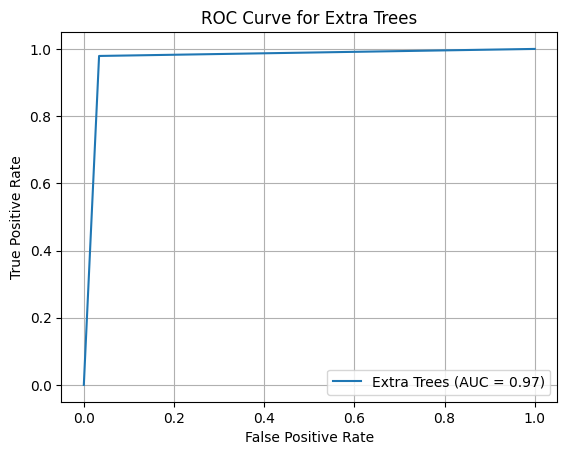

In [98]:
def plot_roc_curve(true_y, y_pred):
    fpr, tpr, thresholds = roc_curve(true_y, y_pred)
    plt.plot(fpr, tpr, label='Extra Trees (AUC = %0.2f)' % roc_auc_score(true_y, y_pred))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_test_pred_lgb)
print(f'model 1 AUC score:{roc_auc_score(y_test, y_test_pred_lgb)}')

plt.title("ROC Curve for Extra Trees")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [99]:
model = xgb  #


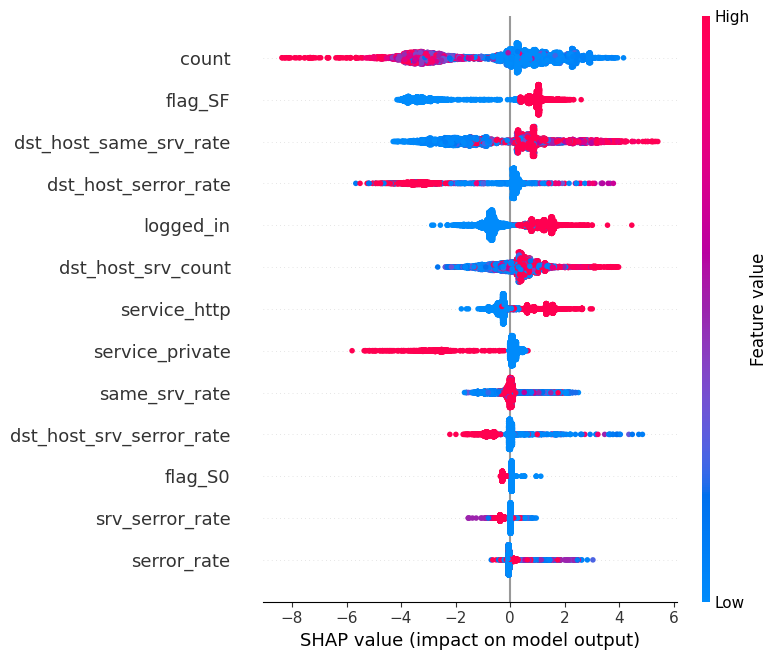

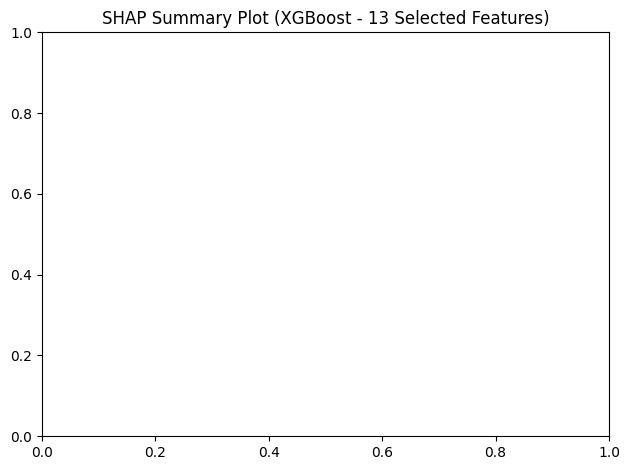

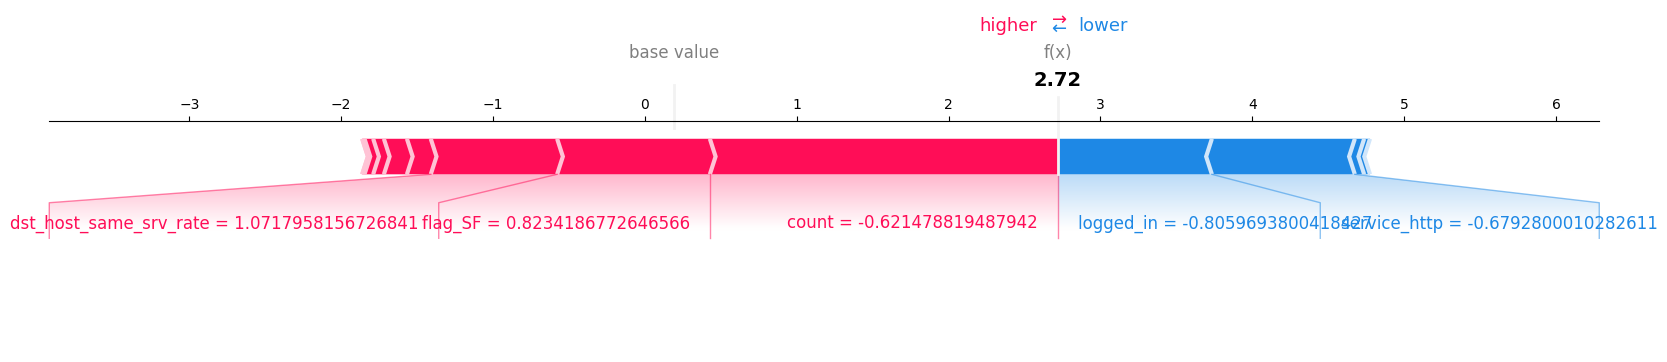

<Figure size 640x480 with 0 Axes>

SHAP explanation for sample 0 completed.


In [100]:
# Make DataFrame for SHAP input (scaled 13 features)
X_test_shap_df = pd.DataFrame(X_test_pca, columns=selected_feature_names)

# SHAP TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_shap_df)

# Summary plot
shap.summary_plot(shap_values, X_test_shap_df)
plt.title("SHAP Summary Plot (XGBoost - 13 Selected Features)")
plt.tight_layout()
plt.show()

# Force plot for a single sample
sample_idx = 0
sample_row = X_test_shap_df.iloc[[sample_idx]]

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    sample_row,
    matplotlib=True,
    show=True
)

plt.tight_layout()
plt.savefig("shap_force_sample0.png", dpi=200)
plt.show()

print(f"SHAP explanation for sample {sample_idx} completed.")


In [101]:
def expert_rules(row):
    rules = []

    # 1) logged_in: not logged in + many connections -> suspicious
    # Rationale: many normal sessions are logged in; many unauthenticated
    # high-count sessions can indicate probing or attacks.
    if (row.get('logged_in', 0) == 0) and (row.get('count', 0) >= 100):
        rules.append("Not logged in with high connection count (possible probe/exploit)")

    # 2) count: extremely high connection count -> DoS/scan
    # We use a high threshold (>=200) since 75% quantile is 144, 90% ~256.
    if row.get('count', 0) >= 200:
        rules.append("High connection count (>200) — possible DoS/scan")

    # 3) serror_rate: very high SYN error rate -> SYN flood / many failed SYNs
    # serror_rate is often 0 or 1; require near-1 to reduce false positives.
    if row.get('serror_rate', 0.0) >= 0.9:
        rules.append("Very high serror_rate (possible SYN flood)")

    # 4) srv_serror_rate: high service-level SYN errors -> service-targeted flood
    if row.get('srv_serror_rate', 0.0) >= 0.9:
        rules.append("Very high srv_serror_rate (service-level SYN errors)")

    # 5) same_srv_rate: very low same_srv_rate => traffic to many different services (scan)
    # Based on distribution, low values (<=0.1) are unusual and indicate scanning/randomness.
    if row.get('same_srv_rate', 1.0) <= 0.10:
        rules.append("Low same_srv_rate (diverse services — possible scan)")

    # 6) dst_host_srv_count: destination host seen serving many connections (victim of scanning/DoS)
    # Use >=200 (near top-tail)
    if row.get('dst_host_srv_count', 0) >= 200:
        rules.append("High dst_host_srv_count (dest host receiving many service connections)")

    # 7) dst_host_same_srv_rate: destination host same-service rate == 1 -> focused host scan/port probing
    if row.get('dst_host_same_srv_rate', 0.0) == 1.0:
        rules.append("dst_host_same_srv_rate == 1.0 (targeted service access on host — possible scan)")

    # 8) dst_host_serror_rate: high dest-host SYN error rate -> target being flooded or probed
    if row.get('dst_host_serror_rate', 0.0) >= 0.9:
        rules.append("High dst_host_serror_rate (dest-host SYN errors)")

    # 9) dst_host_srv_serror_rate: high dest-host service SYN error rate -> service-level victim
    if row.get('dst_host_srv_serror_rate', 0.0) >= 0.9:
        rules.append("High dst_host_srv_serror_rate (dest-host service SYN errors)")

    # 10) service_http: HTTP access without login (suspicious for web exploits / data exfiltration)
    # Only flag if not logged in (reduce FP)
    if (row.get('service_http', 0) == 1) and (row.get('logged_in', 1) == 0) and (row.get('serror_rate', 0) >= 0.6 or row.get('same_srv_rate', 1) <= 0.15 ):
         rules.append("HTTP access without login + abnormal traffic → possible exploitation")

    # 11) service_private: private service used (often unusual) -> flag for inspection
    if row.get('service_private', 0) == 1:
        rules.append("Access to PRIVATE service (monitor for suspicious internal traffic)")

    # 12) flag_S0: S0 indicates many half-open (no reply) connections — suspicious
    if row.get('flag_S0', 0) == 1:
        rules.append("Flag S0 present (half-open connections — suspicious)")

    # 13) flag_SF: SF is common for many normal closes, but in combination with high errors it's suspicious.
    # We use flag_SF only when combined with high serror or high dst_host_serror to reduce false alarms.
    if (row.get('flag_SF', 0) == 1) and ((row.get('serror_rate', 0.0) >= 0.8) or (row.get('dst_host_serror_rate', 0.0) >= 0.8)):
        rules.append("Flag SF + high SYN errors (suspicious sequence)")

    return rules


In [102]:
class IntrusionAgent:
    def __init__(self, scaler, model, selected_features, label_encoder):
        self.scaler = scaler
        self.model = model
        self.selected_features = selected_features
        self.le = label_encoder

    def perceive(self, row):
        df = pd.DataFrame([row])
        df13 = df[self.selected_features]
        scaled = self.scaler.transform(df13)
        return scaled

    def ml_decision(self, processed):
        pred = int(self.model.predict(processed)[0])  # 0=anomaly, 1=normal
        label = self.le.inverse_transform([pred])[0]

        # probability of ANOMALY = class 0
        conf_anomaly = float(self.model.predict_proba(processed)[0][0])

        return pred, label, conf_anomaly

    def rule_decision(self, row):
        return expert_rules(row)

    def decide_and_act(self, row):
        processed = self.perceive(row)
        ml_pred, ml_label, ml_conf_anomaly = self.ml_decision(processed)
        rules = self.rule_decision(row)

        rule_fired = len(rules) > 0
        ml_anomaly = (ml_pred == 0)

        # ======================================================
        # PRIORITY 1 — RULES + ML → BLOCK
        # ======================================================
        if ml_anomaly and rule_fired:
            return {
                "is_anomaly": True,
                "ml_pred": ml_pred,
                "ml_label": ml_label,
                "ml_confidence": ml_conf_anomaly,
                "rules_triggered": rules,
                "action": "BLOCK",
                "reason": ["Both ML and Rules indicate anomaly"]
            }

        # ======================================================
        # PRIORITY 2 — RULES ONLY → BLOCK
        # ======================================================
        if rule_fired:
            return {
                "is_anomaly": True,
                "ml_pred": ml_pred,
                "ml_label": ml_label,
                "ml_confidence": ml_conf_anomaly,
                "rules_triggered": rules,
                "action": "BLOCK",
                "reason": rules
            }

        # ======================================================
        # PRIORITY 3 — ML ANOMALY
        # ======================================================
        if ml_anomaly:
            if ml_conf_anomaly >= 0.75:
                act = "BLOCK"
            else:
                act = "ALERT"
            return {
                "is_anomaly": True,
                "ml_pred": ml_pred,
                "ml_label": ml_label,
                "ml_confidence": ml_conf_anomaly,
                "rules_triggered": [],
                "action": act,
                "reason": [f"ML anomaly probability = {ml_conf_anomaly:.3f}"]
            }

        # ======================================================
        # PRIORITY 4 — ML says normal but anomaly probability medium
        # ALERT THRESHOLD FIXED HERE ↓↓↓
        # ======================================================
        if 0.20 <= ml_conf_anomaly < 0.75:
            return {
                "is_anomaly": False,
                "ml_pred": ml_pred,
                "ml_label": ml_label,
                "ml_confidence": ml_conf_anomaly,
                "rules_triggered": [],
                "action": "ALERT",
                "reason": [f"Moderate anomaly likelihood = {ml_conf_anomaly:.3f}"]
            }

        # ======================================================
        # PRIORITY 5 — SAFE NORMAL
        # ======================================================
        return {
            "is_anomaly": False,
            "ml_pred": ml_pred,
            "ml_label": ml_label,
            "ml_confidence": ml_conf_anomaly,
            "rules_triggered": [],
            "action": "ALLOW",
            "reason": []
        }


In [103]:
agent = IntrusionAgent(
    scaler=scaler,
    model=xgb,
    selected_features=selected_feature_names,
    label_encoder=label_encoder
)


In [ ]:
sample_index = 0
raw_sample = X_test.iloc[sample_index]

decision = agent.decide_and_act(raw_sample)
print("Decision Summary:", decision)

Decision Summary: {'is_anomaly': True, 'ml_pred': 1, 'ml_label': 'normal', 'ml_confidence': 0.061821043491363525, 'rules_triggered': ['High dst_host_srv_count (dest host receiving many service connections)', 'dst_host_same_srv_rate == 1.0 (targeted service access on host — possible scan)'], 'action': 'BLOCK', 'reason': ['High dst_host_srv_count (dest host receiving many service connections)', 'dst_host_same_srv_rate == 1.0 (targeted service access on host — possible scan)']}


In [105]:
num_samples = 5
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

for idx in random_indices:
    sample_raw = X_test.iloc[idx]
    result = agent.decide_and_act(sample_raw)

    print(f"\nSample Index: {idx}")
    print("Raw input features:")
    print(sample_raw)
    print("\nHybrid Agent Decision:")
    print(f"ML Prediction: {result['ml_pred']} (Confidence: {result['ml_confidence']})")
    print(f"Rules Triggered: {result['rules_triggered']}")
    print(f"Final Action: {result['action']}")
    print(f"Reason: {result['reason']}")


Sample Index: 4572
Raw input features:
duration              0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
                  ...  
flag_S1           False
flag_S2           False
flag_S3           False
flag_SF           False
flag_SH           False
Name: 23591, Length: 118, dtype: object

Hybrid Agent Decision:
ML Prediction: 0 (Confidence: 0.9999956488609314)
Rules Triggered: ['Access to PRIVATE service (monitor for suspicious internal traffic)']
Final Action: BLOCK
Reason: ['Both ML and Rules indicate anomaly']

Sample Index: 1155
Raw input features:
duration              0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
                  ...  
flag_S1           False
flag_S2           False
flag_S3           False
flag_SF           False
flag_SH           False
Name: 3100, Length: 118, dtype: object

Hybrid Agent Decision:
ML Prediction: 1 (Confidence: 0.0038102269172668457)
Rules 

In [106]:
def get_new_network_packet():
    random_index = np.random.choice(X_test.index)
    new_packet = X_test.loc[random_index]
    return new_packet

In [107]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))

pickle.dump(xgb, open("xgb_model.pkl", "wb"))

pickle.dump(selected_feature_names, open("features.pkl", "wb"))

pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))
